https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://luv-bansal.medium.com/fine-tuning-bert-for-text-classification-in-pytorch-503d97342db2

### K-means Clustering Algorithm from Scratch

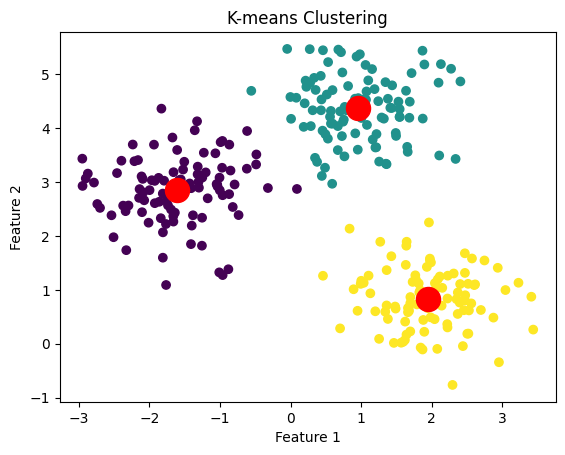

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize centroids from the dataset."""
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def compute_distances(X, centroids):
    """Compute the distance between each data point and the centroids."""
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def compute_centroids(X, labels, k):
    """Compute the new centroids as the mean of all data points assigned to each cluster."""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        old_centroids = centroids
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        centroids = compute_centroids(X, labels, k)
        
        # If centroids do not change, we have converged
        if np.all(centroids == old_centroids):
            break
    
    return centroids, labels

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

    # Run the K-means algorithm
    k = 3
    centroids, labels = kmeans(X, k)

    # Visualize the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')  # Centroids
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering')
    plt.show()

Explanation of the Code:
1. initialize_centroids: Randomly selects k data points from the dataset as initial centroids.
2. compute_distances: Calculates the Euclidean distance between each data point and each centroid.
3. assign_clusters: Assigns each data point to the closest centroid based on the computed distances.
4. compute_centroids: Recalculates the centroids by taking the mean of all data points assigned to each cluster.
5. kmeans: The main function that runs the K-means clustering algorithm, iteratively updating centroids and cluster assignments until convergence or reaching the maximum number of iterations.

Example Usage:
- The make_blobs function generates synthetic data with three clusters.
- The K-means algorithm is applied to the data, and the results are visualized with the final cluster assignments and centroids.

This is a basic implementation and can be further optimized or extended to include additional features such as better initialization techniques (e.g., K-means++), convergence criteria, or more complex distance metrics.

### k-Nearest Neighbors (k-NN) Algorithm from Scratch

In [3]:
from sklearn.datasets import make_classification

# Total number of features
n_features = 10

# Number of informative, redundant, and repeated features
n_informative = 5
n_redundant = 2
n_repeated = 1

# The sum of informative, redundant, and repeated features must be <= n_features
# In this case, 5 + 2 + 1 = 8, which is less than 10 (n_features)
X, y = make_classification(
    n_samples=100, 
    n_features=n_features, 
    n_informative=n_informative, 
    n_redundant=n_redundant, 
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42
)

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Feature matrix shape: (100, 10)
Labels shape: (100,)


The error you're encountering usually arises when you're generating a synthetic dataset using a function like make_classification from the sklearn.datasets module. This function requires that the sum of informative, redundant, and repeated features should be less than or equal to the total number of features. Let's clarify how to avoid this error.

Explanation:
- Informative Features: These are features that are actually used to construct the decision boundary in the classification task.
- Redundant Features: These are linear combinations of the informative features.
- Repeated Features: These are duplicates of some features.

When you specify the number of informative, redundant, and repeated features, their sum must be less than or equal to the total number of features you are generating.

Accuracy: 86.67%


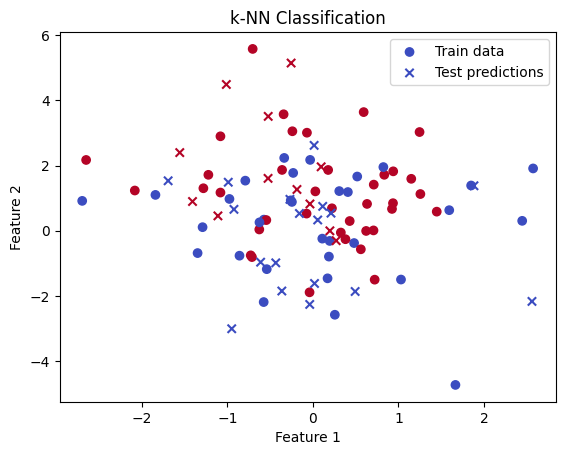

In [4]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two data points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, y_train, X_test, k=3):
    """k-Nearest Neighbors algorithm.
    
    Parameters:
    X_train: np.ndarray - Training data features.
    y_train: np.ndarray - Training data labels.
    X_test: np.ndarray - Test data features.
    k: int - Number of neighbors to consider.
    
    Returns:
    np.ndarray - Predicted labels for the test data.
    """
    predictions = []
    
    for x_test in X_test:
        # Compute distances from x_test to all training samples
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        
        # Get the indices of the k closest neighbors
        k_indices = np.argsort(distances)[:k]
        
        # Get the labels of the k closest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Determine the most common label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return np.array(predictions)

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data for classification
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Create a synthetic dataset
    # X, y = make_classification(n_samples=200, n_features=2, n_classes=2, random_state=42)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run the k-NN algorithm
    k = 3
    predictions = knn(X_train, y_train, X_test, k)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Plot the data and the decision boundary
    import matplotlib.pyplot as plt
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x', cmap='coolwarm', label='Test predictions')
    plt.title("k-NN Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

Key Points:
- n_features: The total number of features you want in your dataset.
- n_informative, n_redundant, n_repeated: These must sum to less than or equal to n_features.
- n_classes: The number of classes in your dataset.

In this example, we set n_features to 10, with 5 informative features, 2 redundant features, and 1 repeated feature, which sums up to 8. This is less than the total number of features (10), so the code runs without error.

Explanation of the Code:
1. euclidean_distance: A function that computes the Euclidean distance between two data points. This is the most common distance metric used in KNN.

2. knn_predict:
    - X_train: The training data features.
    - y_train: The corresponding labels for the training data.
    - X_test: The test data features that you want to classify.
    - k: The number of nearest neighbors to consider when making predictions.

    For each test data point:
    - The distance between the test point and every training point is computed.
    - The distances are sorted, and the labels of the k nearest neighbors are identified.
    - The most common label among the k nearest neighbors is assigned to the test point (majority voting).

3. Example Usage:
- A small synthetic dataset is created for demonstration purposes.
- The knn_predict function is used to predict the classes for a couple of test samples.

Notes:
- This implementation is simple and lacks optimizations such as using KD-trees or Ball trees for faster neighbor searches.
- The algorithm is designed for classification tasks, where the goal is to assign a class label to each test point based on the majority class among its nearest neighbors.

In [ ]:
import numpy as np

np.random.seed(3)

#############################################################
####################### INSTRUCTIONS ########################
#############################################################
"""
Goal: Implement a simple Neural Network to for binary classification over
2-dimensional input data. The network must have 1 hidden layer containing 4 units.

The network should utilize mini-batch training, a sigmoid activation function, and
MSE loss function. The batch size is set in the 
"Parameters" section.

Please fill in the 4 functions in the section labeled "Fill In These Functions."
The function signatures must not change, and must return appropriate outputs based 
on the in-line comments within them. You may add additional functions as you see fit.
You may leverage the functions in the "Utilities" section if you find it necessary.
You may change N, LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS if it helps you train your 
network. Do not modify the code in the section labeled "Do Not Modify Below."
Code in this section will call your functions, so make sure your implementation
is compatible.

Your code must run (you can test it by clicking "Run" button in the top-left).
The "train" method will train your network over NUM_EPOCHS epochs, and print a 
mean-squared error over the hold-out set after each epoch.

Please feel free to add extra print statements if it helps you debug your code.

This exercise is open-book. You may leverage resources you find on the Internet, 
such as syntax references, mathematical formulae, etc., but you should not adapt 
or otherwise use existing implementation code.

The following PDF reference may be useful to you:
https://drive.google.com/file/d/1zbRSQJaPrQHYOGzPYLm6mbFLUHhVxlm2/view?usp=sharing
"""

#############################################################
######################### PARAMETERS ########################
#############################################################
N = 1000
LEARNING_RATE = 1
BATCH_SIZE = 5
NUM_EPOCHS = 10
INPUT_WIDTH = 2
HIDDEN_LAYER_WIDTH = 4
OUTPUT_LAYER_WIDTH = 1
HIDDEN_LAYER_WEIGHTS_SHAPE = (HIDDEN_LAYER_WIDTH, INPUT_WIDTH)
HIDDEN_LAYER_BIASES_SHAPE = (HIDDEN_LAYER_WIDTH, 1)
OUTPUT_LAYER_WEIGHTS_SHAPE = (OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH)
OUTPUT_LAYER_BIASES_SHAPE = (OUTPUT_LAYER_WIDTH, 1)
INITIAL_HIDDEN_LAYER_WEIGHTS = np.random.random(HIDDEN_LAYER_WEIGHTS_SHAPE)
INITIAL_HIDDEN_LAYER_BIASES = np.random.random(HIDDEN_LAYER_BIASES_SHAPE)
INITIAL_OUTPUT_LAYER_WEIGHTS = np.random.random(OUTPUT_LAYER_WEIGHTS_SHAPE)
INITIAL_OUTPUT_LAYER_BIASES = np.random.random(OUTPUT_LAYER_BIASES_SHAPE)

#############################################################
######################### UTILITIES #########################
#############################################################
def sigmoid(z):
    # activation function
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    # derivative of activation function
    return sigmoid(z) * (1 - sigmoid(z))


def assert_has_shape(val, expected_shape):
    assert val.shape == expected_shape, f"Expected {val} to have shape {expected_shape}, but was {val.shape}."


#############################################################
################## FILL IN THESE FUNCTIONS ##################
#############################################################
def compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases):
    # return the weighted inputs (before applying sigmoid) for layer 1 as a 4x1 matrix
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((HIDDEN_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(hidden_layer_weights, x) + hidden_layer_biases
    return weighted_input


def compute_output_layer_weighted_input(
    hidden_layer_activation, output_layer_weights, output_layer_biases
):
    # return the weighted inputs (before applying sigmoid) for output layer as a 1x1 matrix
    assert_has_shape(hidden_layer_activation, (HIDDEN_LAYER_WIDTH, 1))
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((OUTPUT_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(output_layer_weights, hidden_layer_activation) + output_layer_biases
    return weighted_input


def compute_gradients(
    x,
    y,
    hidden_layer_weights,
    hidden_layer_biases,
    hidden_layer_weighted_input,
    output_layer_weights,
    output_layer_biases,
    output_layer_weighted_input,
):
    # x, y is a single training example
    # for a single training example, return the gradient of loss with respect to each layer's weights and biases
    # return value should be a tuple of lists, where the first element is the list of weight gradients,
    # and the second is the list of bias gradients. the shape of each "gradient" should correspond to the shape of the
    # weight/bias matrix it will be used to update.
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # weight_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, INPUT_WIDTH)),
    #     np.zeros(OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH),
    # ]
    # bias_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, 1)),
    #     np.zeros((OUTPUT_LAYER_WIDTH, 1)),
    # ]
    # return weight_gradients, bias_gradients
    
    # Calculate gradients for weights and biases of both layers.

    # Calculate the error in the output layer.
    output_layer_error = sigmoid(output_layer_weighted_input) - y
    
    # Calculate the gradient for the output layer weights and biases.
    output_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * sigmoid(hidden_layer_weighted_input)
    output_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * 1
    
    # # Calculate the error in the hidden layer.
    hidden_layer_error = np.dot(output_layer_weights.T, output_layer_error)
    
    # Calculate the gradient for the hidden layer weights and biases.
    # hidden_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * x.T
    # hidden_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * 1
    hidden_layer_weight_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input) * x.T
    hidden_layer_bias_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input)
    
    # Return the gradients.
    weight_gradients = [hidden_layer_weight_gradients, output_layer_weight_gradients]
    bias_gradients = [hidden_layer_bias_gradients, output_layer_bias_gradients]
    
    return weight_gradients, bias_gradients


def get_new_weights_and_biases(
    training_batch,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # training_batch is a list of (x, y) training examples
    # return the new weights and biases after processing this batch of data, and according to LEARNING_RATE

    # fill in
    # new_weights = [hidden_layer_weights, output_layer_weights]
    # new_biases = [hidden_layer_biases, output_layer_biases]
    # return new_weights, new_biases

    # Update the weights and biases based on the training batch and learning rate.

    # Initialize the accumulators for gradients.
    total_weight_gradients = [np.zeros_like(w) for w in [hidden_layer_weights, output_layer_weights]]
    total_bias_gradients = [np.zeros_like(b) for b in [hidden_layer_biases, output_layer_biases]]
    
    for x, y in training_batch:
        # Compute the weighted inputs for both layers.
        hidden_layer_weighted_input = compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases)
        hidden_layer_activation = sigmoid(hidden_layer_weighted_input)
        output_layer_weighted_input = compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases)
        
        # Compute gradients for this training example.
        weight_gradients, bias_gradients = compute_gradients(
            x, y, hidden_layer_weights, hidden_layer_biases, hidden_layer_weighted_input,
            output_layer_weights, output_layer_biases, output_layer_weighted_input
        )
        
        # Accumulate gradients.
        total_weight_gradients = [twg + wg for twg, wg in zip(total_weight_gradients, weight_gradients)]
        total_bias_gradients = [tbg + bg for tbg, bg in zip(total_bias_gradients, bias_gradients)]
    
    # Update weights and biases using the accumulated gradients and learning rate.
    learning_rate = LEARNING_RATE
    new_weights = [w - learning_rate * g for w, g in zip([hidden_layer_weights, output_layer_weights], total_weight_gradients)]
    new_biases = [b - learning_rate * g for b, g in zip([hidden_layer_biases, output_layer_biases], total_bias_gradients)]
    
    return new_weights, new_biases

    
#############################################################
#################### DO NOT MODIFY BELOW ####################
#############################################################
def predict(
    x,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    hidden_layer_activation = sigmoid(compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases))
    output_layer_activation = sigmoid(compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases))
    return output_layer_activation[0][0]

def train(
    X,
    Y,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # X is an array of (2 x 1) input instances
    # Y is an array of scalar targets
    for batch_start in range(0, len(X), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = X[batch_start:batch_end]
        y_batch = Y[batch_start:batch_end]
        batch = list(zip(x_batch, y_batch))

        new_weights, new_biases = get_new_weights_and_biases(
            batch,
            hidden_layer_weights,
            hidden_layer_biases,
            output_layer_weights,
            output_layer_biases,
        )
        hidden_layer_weights, output_layer_weights = new_weights
        hidden_layer_biases, output_layer_biases = new_biases

    # return the final weights and biases
    return (
        [hidden_layer_weights, output_layer_weights],
        [hidden_layer_biases, output_layer_biases],
    )


def compute_mse(
    X_test,
    Y_test,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    predictions = []
    for x in X_test:
        predictions.append(
            predict(
                x,
                hidden_layer_weights,
                hidden_layer_biases,
                output_layer_weights,
                output_layer_biases,
            )
        )
    y_hat = np.array(predictions)
    return np.mean((y_hat - Y_test) ** 2)


# prepare input data
X = np.random.choice([0, 1], (N, 2))
Y = np.logical_xor(X[:, 0], X[:, 1]) * 1
X = X + 0.1 * np.random.random((N, 2))
X = [np.array([x]).T for x in X]

# split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# initialize weigths, biases
hidden_layer_weights, hidden_layer_biases = (
    INITIAL_HIDDEN_LAYER_WEIGHTS,
    INITIAL_HIDDEN_LAYER_BIASES,
)
output_layer_weights, output_layer_biases = (
    INITIAL_OUTPUT_LAYER_WEIGHTS,
    INITIAL_OUTPUT_LAYER_BIASES,
)

# train over epochs, calculate MSE at each epoch
for epoch in range(NUM_EPOCHS):
    weights, biases = train(
        X_train,
        Y_train,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    hidden_layer_weights, output_layer_weights = weights
    hidden_layer_biases, output_layer_biases = biases
    epoch_mse = compute_mse(
        X_test,
        Y_test,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    print(f"MSE (epoch {epoch}):", epoch_mse)

print("done")


## Implement NN building blocks by yourself

In [ ]:
pip install torch torchvision

from IPython.display import clear_output
clear_output()

## DataLoader

In [ ]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

In [ ]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

In [ ]:
from torch.utils.data import TensorDataset

torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

In [ ]:
for example in joint_dataset:
    print('  x: ', example[0], '  y: ', example[1])

In [ ]:
joint_dataset = TensorDataset(t_x, t_y)

torch.manual_seed(1) 
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

In [ ]:
for epoch in range(2): 
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

## Simple use case

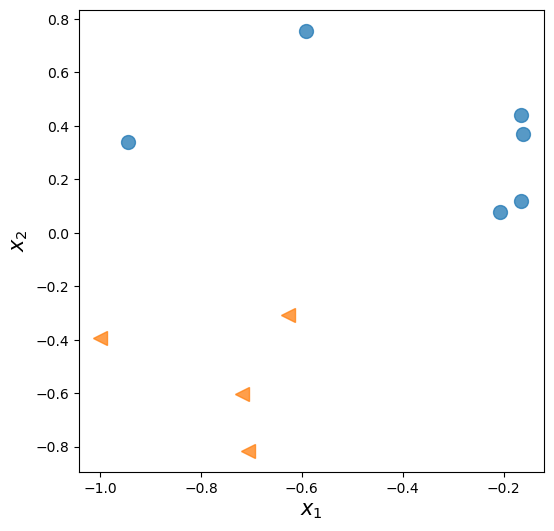

In [72]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(10, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 6
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [73]:
x, x[y==0, 0]

(array([[-0.166,  0.441],
        [-1.   , -0.395],
        [-0.706, -0.815],
        [-0.627, -0.309],
        [-0.206,  0.078],
        [-0.162,  0.37 ],
        [-0.591,  0.756],
        [-0.945,  0.341],
        [-0.165,  0.117],
        [-0.719, -0.604]]),
 array([-0.166, -0.206, -0.162, -0.591, -0.945, -0.165]))

In [74]:
y, y==0

(array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ True, False, False, False,  True,  True,  True,  True,  True,
        False]))

In [75]:
x[[1]]

array([[-1.   , -0.395]])

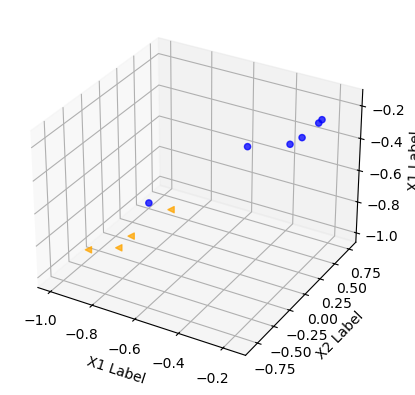

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[y==0, 0], x[y==0, 1], x[y==0, 0], alpha=0.75, c = 'b', marker='o')
ax.scatter(x[y==1, 0], x[y==1, 1], x[y==1, 0], alpha=0.75, c = 'orange', marker='<')

ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('X1 Label')

plt.show()

In [ ]:
pip install mlxtend

In [22]:
x, y

(array([[-0.166,  0.441],
        [-1.   , -0.395],
        [-0.706, -0.815],
        [-0.627, -0.309],
        [-0.206,  0.078],
        [-0.162,  0.37 ],
        [-0.591,  0.756],
        [-0.945,  0.341],
        [-0.165,  0.117],
        [-0.719, -0.604]]),
 array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1.]))

In [76]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Load Data
# Assuming you have already loaded your data into a DataFrame called 'hr_data'
# Example: hr_data = pd.read_csv('hr_data.csv')

# 2. Split Data into Features and Target
# X = hr_data.drop('role', axis=1)  # Features
# y = hr_data['role']               # Target variable

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 4. Build Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 5. Print Rules
# tree_rules = export_text(clf, feature_names=list(X.columns))
tree_rules = export_text(clf)
print(tree_rules)

|--- feature_1 <= -0.12
|   |--- class: 1.0
|--- feature_1 >  -0.12
|   |--- class: 0.0



In [81]:
X_test, y_test

(array([[-0.165,  0.117],
        [-1.   , -0.395],
        [-0.162,  0.37 ]]),
 array([0., 1., 0.]))

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_99158/1505964974.py:8: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y_test.astype(np.integer),


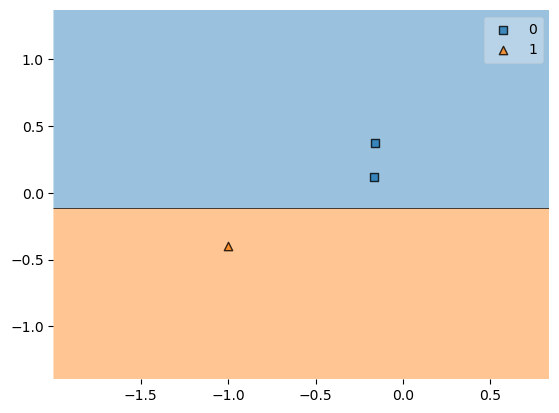

In [77]:
from mlxtend.plotting import plot_decision_regions

ax = fig.add_subplot(1, 1, 1)
# plot_decision_regions(X=X_test.numpy(),
#                       y=y_test.numpy().astype(np.integer),
#                       clf=clf)
plot_decision_regions(X=X_test,
                      y=y_test.astype(np.integer),
                      clf=clf)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_99158/2224754298.py:2: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X_test, y_test.astype(np.integer), clf=clf, legend=2)


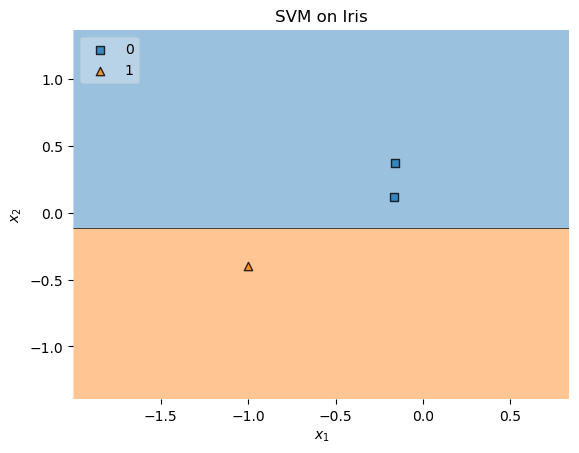

In [83]:
# Plotting decision regions
plot_decision_regions(X_test, y_test.astype(np.integer), clf=clf, legend=2)

# Adding axes annotations
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('SVM on Iris')
plt.show()

In [37]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print rules (feature coefficients)
feature_names = x
for role, coef in zip(model.classes_, model.coef_):
    print(f"Rules for role '{role}':")
    for feature, weight in zip(feature_names, coef):
        print(f"{feature}: {weight:.4f}")
    print()

Rules for role '0.0':
[-0.166  0.441]: -0.2508
[-1.    -0.395]: -1.1305



In [40]:
x

array([[-0.166,  0.441],
       [-1.   , -0.395],
       [-0.706, -0.815],
       [-0.627, -0.309],
       [-0.206,  0.078],
       [-0.162,  0.37 ],
       [-0.591,  0.756],
       [-0.945,  0.341],
       [-0.165,  0.117],
       [-0.719, -0.604]])

In [38]:
model.classes_

array([0., 1.])

In [39]:
model.coef_

array([[-0.251, -1.13 ]])

In [65]:
x, y

(array([[-0.166,  0.441],
        [-1.   , -0.395],
        [-0.706, -0.815],
        [-0.627, -0.309],
        [-0.206,  0.078],
        [-0.162,  0.37 ],
        [-0.591,  0.756],
        [-0.945,  0.341],
        [-0.165,  0.117],
        [-0.719, -0.604]]),
 array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1.]))

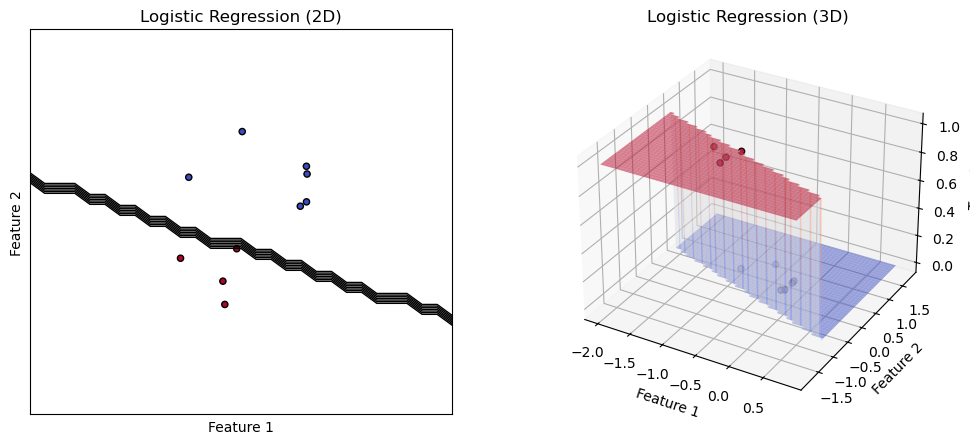

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)
X, y = x, y
# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot data points
plt.figure(figsize=(12, 5))

# Plot in 2D
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linewidths=1)

plt.title('Logistic Regression (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Plot in 3D
ax = plt.subplot(1, 2, 2, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.plot_surface(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

ax.set_title('Logistic Regression (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()


In [48]:
from mlxtend.plotting import plot_decision_regions

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_99158/2031203948.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y=y.astype(np.integer),


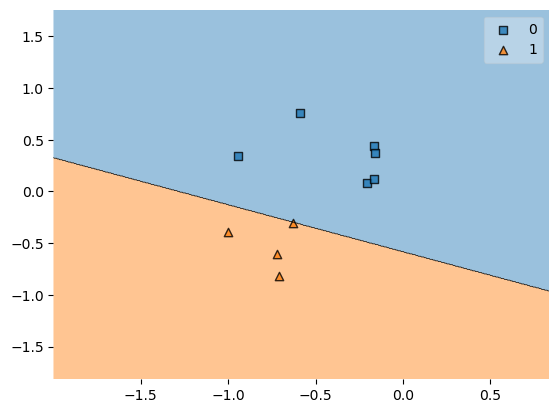

In [69]:
ax = fig.add_subplot(1, 1, 1)
plot_decision_regions(X=X,
                      y=y.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)
X, y = x, y
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
#                            n_informative=2, n_redundant=0, n_clusters_per_class=1, 
#                            random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
plot_decision_regions(X, y.astype(np.integer), clf=model, legend=2, ax=ax)

# Add plot decorations
ax.set_title('Decision Regions (3D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()

In [ ]:
X, y

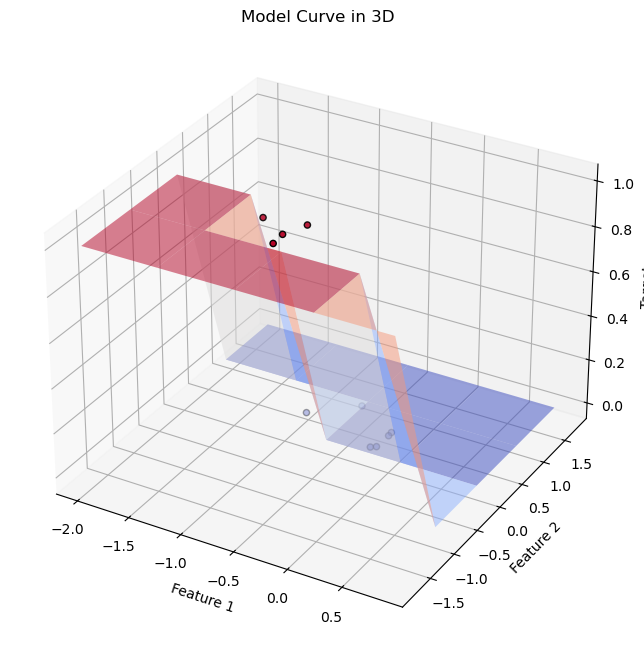

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic data
# X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=42)
X,y=x,y
# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate a grid of points spanning the input feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5), np.linspace(y_min, y_max, 5))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the model curve in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z.reshape(xx.shape), cmap='coolwarm', alpha=0.5)

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', s=20, edgecolors='k')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Model Curve in 3D')

plt.show()

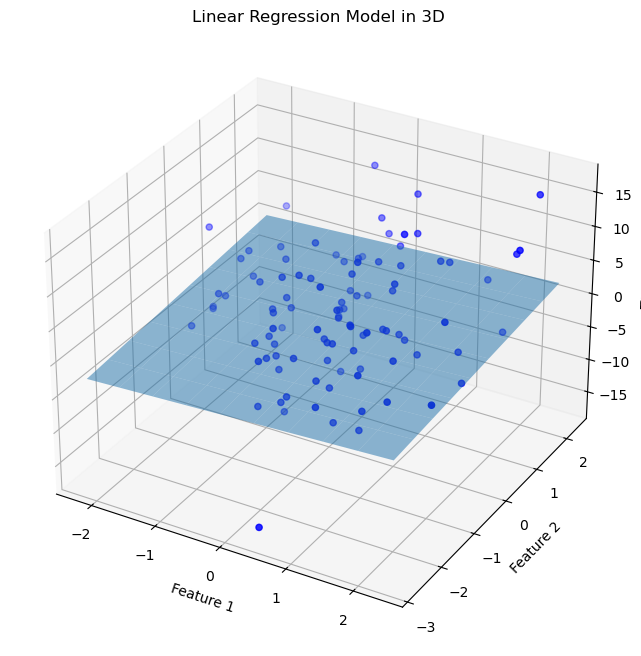

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 3)  # Three features
y = 2 * X[:, 0] + 3 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100)  # Linear relationship with noise

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', marker='o')

# Generate plane points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))
zz = (-model.intercept_ - model.coef_[0] * xx - model.coef_[1] * yy) / model.coef_[2]

# Plot the plane representing the linear model
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Linear Regression Model in 3D')

plt.show()

https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

https://github.com/rasbt/mlxtend/blob/master/docs/sources/user_guide/plotting/plot_decision_regions.ipynb

https://github.com/drewwilimitis/Machine-Learning-Projects/blob/master/Plot%20Decision%20Regions.ipynb

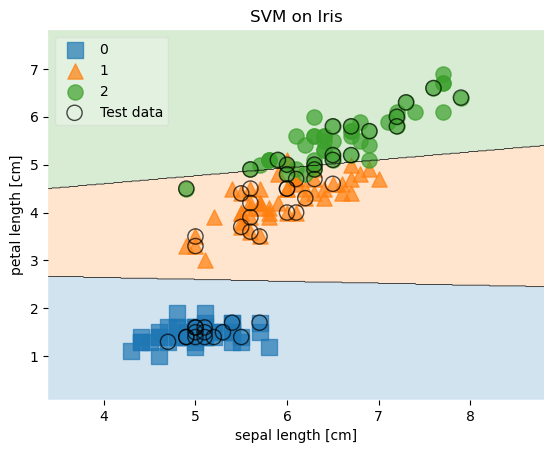

In [90]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target
X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=3)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X_train, y_train)

# Specify keyword arguments to be passed to underlying plotting functions
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}
# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      zoom_factor=1.1)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

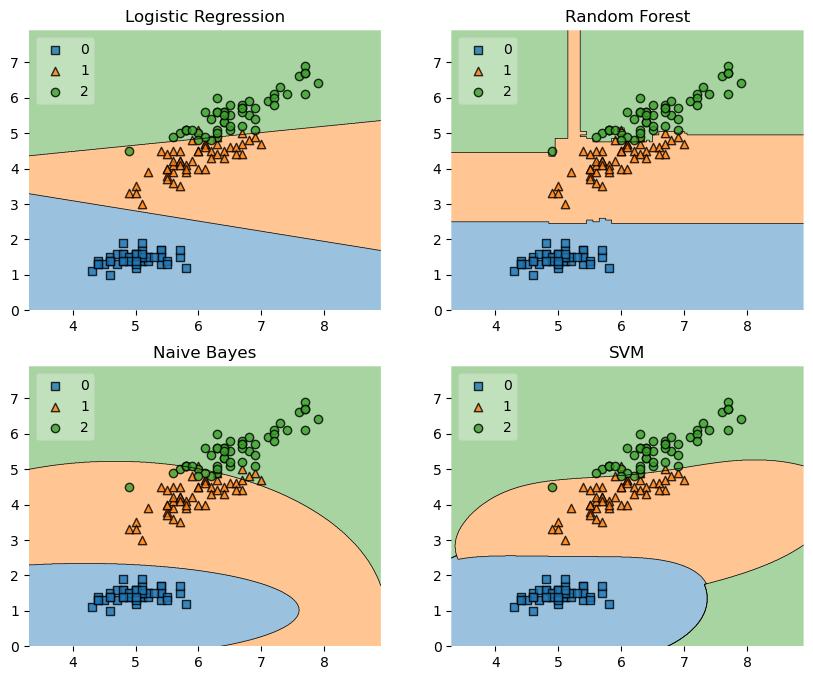

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

In [ ]:
!pip install kmodes

In [94]:
# Define the data set with three categorical variables 
data = np.array([['A', 'B', 'C'], 
                 ['B', 'C', 'A'], 
                 ['C', 'A', 'B'], 
                 ['A', 'C', 'B'], 
                 ['A', 'A', 'B']]) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 4.0
Run 1, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
S

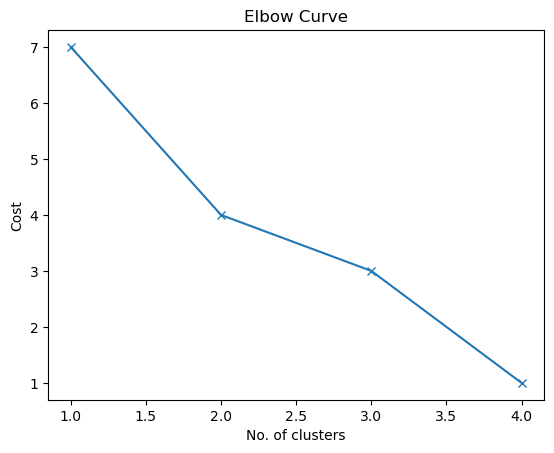

In [95]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 
  
# Elbow curve to find optimal K 
cost = [] 
K = range(1,5) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(data) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [97]:
data

,Feature1,Feature2
0,A,X
1,B,Y
2,C,Z
3,A,X
4,B,Y
5,C,Z
6,A,X
7,B,Y


In [98]:
clusters

array([1, 0, 0, 1, 0, 0, 1, 0], dtype=uint16)

In [99]:
clusters==0

array([False,  True,  True, False,  True,  True, False,  True])

In [96]:
from kmodes.kmodes import KModes
import pandas as pd

# Example categorical data
data = pd.DataFrame({
    'Feature1': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B'],
    'Feature2': ['X', 'Y', 'Z', 'X', 'Y', 'Z', 'X', 'Y']
})

# Initialize KModes with the number of clusters
kmode = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1)

# Fit the model to the data
clusters = kmode.fit_predict(data)

# Print elements in each cluster
for cluster in range(max(clusters) + 1):
    print(f"Cluster {cluster}:")
    cluster_elements = data.iloc[clusters == cluster]
    print(cluster_elements)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 4.0
Best run was number 1
Cluster 0:
  Feature1 Feature2
1        B        Y
2        C        Z
4        B        Y
5        C        Z
7        B        Y
Cluster 1:
  Feature1 Feature2
0        A        X
3        A        X
6        A        X


In [100]:
# Create a directory to store cluster CSV files
import os
if not os.path.exists('cluster_data'):
    os.makedirs('cluster_data')

# Save data for each cluster in a separate CSV file
for cluster in range(max(clusters) + 1):
    cluster_elements = data.iloc[clusters == cluster]
    cluster_elements.to_csv(f'cluster_data/cluster_{cluster}.csv', index=False)

In [101]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'Feature1': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Feature2': ['X', 'X', 'Y', 'Y', 'Z', 'Z']
})

# Find groups with same attribute values
same_attribute_groups = []

# Iterate over each column
for column in data.columns:
    unique_values = data[column].unique()
    for value in unique_values:
        group = data[data[column] == value]
        if len(group) == len(data):
            same_attribute_groups.append(group)

# Print groups
for group in same_attribute_groups:
    print(group)


In [105]:
data

,Feature1,Feature2
0,A,X
1,A,X
2,B,Y
3,B,Y
4,C,Z
5,C,Z


In [1]:
import pandas as pd

# Example DataFrame
data = pd.DataFrame({
    'Feature1': ['A', 'A', 'B', 'B', 'C', 'C'],
    'Feature2': ['X', 'X', 'Y', 'Y', 'Z', 'Z']
})

# Group the DataFrame by all attribute values
groups = data.groupby(data.columns.tolist())

# Filter out groups with more than one row
all_same_attribute_groups = [group for _, group in groups if len(group) > 1]

# Print groups
for group in all_same_attribute_groups:
    print(len(all_same_attribute_groups))
    print(group)

3
  Feature1 Feature2
0        A        X
1        A        X
3
  Feature1 Feature2
2        B        Y
3        B        Y
3
  Feature1 Feature2
4        C        Z
5        C        Z
